<a href="https://colab.research.google.com/github/cemilebilgir/final/blob/main/danish_residental_research(stat112%20final%20).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving Danish_Residential_Data_With_Missing.csv to Danish_Residential_Data_With_Missing.csv


In [ ]:
df = pd.read_csv("Danish_Residential_Data_With_Missing.csv") #Creating a DataFrame with dirty csv file
df.info() #Checking it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   region                           948 non-null    object 
 1   PROPERTY_TYPE                    954 non-null    object 
 2   year_built                       957 non-null    object 
 3   SIZE_SQM                         961 non-null    object 
 4   rooms                            955 non-null    object 
 5   CONDITION                        955 non-null    object 
 6   heating_type                     870 non-null    object 
 7   ENERGY_LABEL                     954 non-null    object 
 8   price_dkk                        957 non-null    object 
 9   SALE_YEAR                        954 non-null    object 
 10  garden_available                 944 non-null    object 
 11  DISTANCE_TO_CITY_KM              943 non-null    float64
 12  school_rating       

In [ ]:
# Examining the head of the data
df.head()
# We can see that for example in "region" and "condition" column, there is "@" symbol in some values. It needs to be cleaned.

,region,PROPERTY_TYPE,year_built,SIZE_SQM,rooms,CONDITION,heating_type,ENERGY_LABEL,price_dkk,SALE_YEAR,garden_available,DISTANCE_TO_CITY_KM,school_rating,PARKING_AVAILABLE,nom_interest_rate%,DK_ANN_INFL_RATE%,yield_on_mortgage_credit_bonds%
0,North Jutland,detached house,2021,95,1,Good,electric,C,9380128,2005,No,45.275859,3.0,Yes,9.60278900396085%,1.823656165222105,5.291862485801165%
1,Zealand,TERRACED HOUSE,1944,268,5,New,Electric,f,3768294,2013,No,15.553027,1.0,Yes,2.0119052318724733%,4.32444935111773,2.238573578421397%
2,Centr@l Jutl@nd,apartment,2021,225,10,Good,Gas,F,5374303,2001,no,43.067939,1.0,Yes,5.452038188544904%,1.5675230480578528,3.391303894088885%
3,SOUTHERN DENMARK,Farmhouse,2013,185,4,New,NaN,B,NaN,1999,No,38.904036,4.0,no,0.3981511407047622%,2.2579491241695826,5.145148697255435%
4,CAPITAL,Apartment,1965,155,2,Needs Renov@tion,none,G,7084512,2008,Yes,28.956009,5.0,NO,6.791066811541049%,1.647998467467407,1.6367099821423114%


In [ ]:
# Examining the tail of the data
df.tail()
# We can see that for example in garden_available column, although there are multiple yeses (Yes,yes) they represent the same value.

,region,PROPERTY_TYPE,year_built,SIZE_SQM,rooms,CONDITION,heating_type,ENERGY_LABEL,price_dkk,SALE_YEAR,garden_available,DISTANCE_TO_CITY_KM,school_rating,PARKING_AVAILABLE,nom_interest_rate%,DK_ANN_INFL_RATE%,yield_on_mortgage_credit_bonds%
1000,Southern Denm@rk,NaN,1972,156,3,New,Centr@l,D,6220822,2013,Yes,18.711559,4.0,NaN,6.930549608119696%,1.2457401300365487,3.6223369252822057%
1001,Southern Denmark,Detached house,2022,258,1,New,None,A,1832652,2016,No,21.289501,1.0,YES,4.938548108363458%,4.452463740368158,6.758651974679246%
1002,Capital,Terraced House,1953,240,6,needs renovation,central,E,3297316,2011,Yes,10.932387,3.0,NaN,5.20456619477323%,3.9077570225993874,3.1654781251744946%
1003,Southern Denmark,TERRACED HOUSE,2010,NaN,1,needs renovation,Electric,a,7345376,1999,Yes,NaN,4.0,yes,9.033400305285316%,3.043118967720914,4.526692830982784%
1004,Central Jutland,Detached House,2013,248,10,Needs Renovation,central,E,1852174,1993,yes,14.799825,5.0,NO,4.02001538018479%,0.937679361681334,6.926382531113124%


In [ ]:
# Showing first 5 row to check for any seperation argument problem and header issues
print(df.iloc[:5, :17])
# The dataset is comma-separated (`,`), and the header row is recognized correctly. No separation or header issues are detected.

             region   PROPERTY_TYPE year_built SIZE_SQM rooms  \
0     North Jutland  detached house       2021       95     1   
1           Zealand  TERRACED HOUSE       1944      268     5   
2   Centr@l Jutl@nd       apartment       2021      225    10   
3  SOUTHERN DENMARK       Farmhouse       2013      185     4   
4           CAPITAL       Apartment       1965      155     2   

          CONDITION heating_type ENERGY_LABEL price_dkk SALE_YEAR  \
0              Good     electric           C    9380128      2005   
1               New    Electric             f   3768294      2013   
2              Good          Gas            F   5374303      2001   
3               New          NaN            B       NaN      1999   
4  Needs Renov@tion         none            G   7084512      2008   

  garden_available  DISTANCE_TO_CITY_KM  school_rating PARKING_AVAILABLE  \
0              No             45.275859            3.0               Yes   
1               No            15.553027   

In [ ]:
# Check if column headers are values, not variable names
print(df.columns)
# Columns headers are all variable names, not values as expected

Index(['region', 'PROPERTY_TYPE', 'year_built', 'SIZE_SQM', 'rooms',
       'CONDITION', 'heating_type', 'ENERGY_LABEL', 'price_dkk', 'SALE_YEAR',
       'garden_available', 'DISTANCE_TO_CITY_KM', 'school_rating',
       'PARKING_AVAILABLE', 'nom_interest_rate%', 'DK_ANN_INFL_RATE%',
       'yield_on_mortgage_credit_bonds%'],
      dtype='object')


In [ ]:
# Showing first 15 rows to check if multiple variables are stored in one column,
#variables are stored in both rows and columns, multiple types of observational units are stored in the same table and single observational unit is stored in multiple tables.
df.head(15)
# It can be seen that the dataset doesn't have multiple variables stored in one column,
#variables in both rows and columns, or multiple observational units in one table. It doesn't require stacking or unstacking

,region,PROPERTY_TYPE,year_built,SIZE_SQM,rooms,CONDITION,heating_type,ENERGY_LABEL,price_dkk,SALE_YEAR,garden_available,DISTANCE_TO_CITY_KM,school_rating,PARKING_AVAILABLE,nom_interest_rate%,DK_ANN_INFL_RATE%,yield_on_mortgage_credit_bonds%
0,North Jutland,detached house,2021,95,1,Good,electric,C,9380128,2005,No,45.275859,3.0,Yes,9.60278900396085%,1.823656165222105,5.291862485801165%
1,Zealand,TERRACED HOUSE,1944,268,5,New,Electric,f,3768294,2013,No,15.553027,1.0,Yes,2.0119052318724733%,4.32444935111773,2.238573578421397%
2,Centr@l Jutl@nd,apartment,2021,225,10,Good,Gas,F,5374303,2001,no,43.067939,1.0,Yes,5.452038188544904%,1.5675230480578528,3.391303894088885%
3,SOUTHERN DENMARK,Farmhouse,2013,185,4,New,NaN,B,NaN,1999,No,38.904036,4.0,no,0.3981511407047622%,2.2579491241695826,5.145148697255435%
4,CAPITAL,Apartment,1965,155,2,Needs Renov@tion,none,G,7084512,2008,Yes,28.956009,5.0,NO,6.791066811541049%,1.647998467467407,1.6367099821423114%
5,Ze@l@nd,Apartment,1981,280,10,good,NONE,F,7603109,2011,YES,32.818249,3.0,Yes,9.510914780682729%,3.5697751364450894,NaN
6,southern denmark,NaN,1929,170,8,New,Electric,F,7240408,2023,No,30.548474,1.0,No,5.44192967673302%,4.372111670631515,3.741190141807877%
7,NaN,Apartment,2023,274,NaN,New,Gas,g,NaN,2013,No,48.693718,4.0,na,8.111077411902924%,4.752064230300409,2.834745659774601%
8,Central Jutland,FARMHOUSE,1959,211,2,Needs Renovation,Electric,g,2171748,2009,No,39.879888,5.0,No,4.765961082258047%,2.4134339289100604,1.1537251221793177%
9,southern denmark,Detached house,1902,258,8,Needs renovation,NONE,E,9056710,1996,Yes,23.801112,2.0,No,3.4875120284915218%,2.9259493964138694,6.0602106237122735%


In [ ]:
# Renaming all columns to the same format (lowercase_lowercase)
df.rename(columns = {"PROPERTY_TYPE" : "property_type", "SIZE_SQM" : "size_sqm", "CONDITION" : "condition", "ENERGY_LABEL" : "energy_label",
                     "SALE_YEAR" : "sale_year", "DISTANCE_TO_CITY_KM" : "distance_to_city_km", "PARKING_AVAILABLE" : "parking_available",
                     "DK_ANN_INFL_RATE%" : "dk_ann_infl_rate","yield_on_mortgage_credit_bonds%":"yield_on_mortgage_credit_bonds","nom_interest_rate%":"nom_interest_rate"}, inplace = True)

In [ ]:
# Checking the frequencies of the categoric columns:
categorical_columns = ['region', 'property_type', 'condition', 'heating_type', 'energy_label', 'garden_available', 'parking_available']

#looping in categoric columns to see the frequencies:
for col in categorical_columns:
  print(df[col].value_counts())
  print()

region
Central Jutland      40
C@pit@l              39
 Central Jutland     39
southern denmark     37
north jutland        37
Centr@l Jutl@nd      35
capital              35
North Jutl@nd        34
Capital              34
 Southern Denmark    33
Capital              33
Ze@l@nd              32
central jutland      32
Zealand              32
North jutland        31
ZEALAND              31
zealand              30
Southern denmark     30
 North Jutland       30
Southern Denm@rk     30
CAPITAL              30
NORTH JUTLAND        29
 Capital             29
North Jutland        29
Southern Denmark     28
SOUTHERN DENMARK     28
Zealand              26
 Zealand             26
CENTRAL JUTLAND      25
Central jutland      24
Name: count, dtype: int64

property_type
Ap@rtment          55
 Detached House    52
 Apartment         46
Detached House     45
Farmhouse          43
Farmhouse          42
Terraced house     42
DETACHED HOUSE     42
TERRACED HOUSE     41
terraced house     41
Apartment   

In [ ]:
# Checking for the central tendency and dispersion values of the numeric columns:
numeric_columns = ['year_built', 'size_sqm', 'rooms', 'price_dkk', 'sale_year','distance_to_city_km', 'school_rating', 'nom_interest_rate',
                   'dk_ann_infl_rate', 'yield_on_mortgage_credit_bonds']

# looping in numeric columns to see the values:
for col in numeric_columns:
  print(col)
  print(df[col].describe())
  print()

year_built
count      957
unique     127
top       1907
freq        19
Name: year_built, dtype: object

size_sqm
count     961
unique    247
top       127
freq       11
Name: size_sqm, dtype: object

rooms
count     955
unique     12
top        10
freq      108
Name: rooms, dtype: object

price_dkk
count         957
unique        953
top       3297316
freq            2
Name: price_dkk, dtype: object

sale_year
count      954
unique      34
top       2021
freq        42
Name: sale_year, dtype: object

distance_to_city_km
count    943.000000
mean      24.820251
std       14.305862
min        0.522674
25%       12.636669
50%       24.906805
75%       36.799502
max       49.854933
Name: distance_to_city_km, dtype: float64

school_rating
count    957.000000
mean       3.002090
std        1.388836
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: school_rating, dtype: float64

nom_interest_rate
count                    952
unique       

In [ ]:
# Checking the existence of missing values (NAs)
print(df.isnull().sum())
print()
print(df.isnull().sum().sum())
# In total there are 943 missing values

region                             57
property_type                      51
year_built                         48
size_sqm                           44
rooms                              50
condition                          50
heating_type                      135
energy_label                       51
price_dkk                          48
sale_year                          51
garden_available                   61
distance_to_city_km                62
school_rating                      48
parking_available                  44
nom_interest_rate                  53
dk_ann_infl_rate                   55
yield_on_mortgage_credit_bonds     35
dtype: int64

943


In [ ]:
# Checking for the unique values in the categoric variables:

categorical_columns = ['region', 'property_type', 'condition', 'heating_type', 'energy_label', 'garden_available', 'parking_available']

#Looping through categoric variables:
for col in categorical_columns:
  print(df[col].unique())
  print()

[' North Jutland' 'Zealand' 'Centr@l Jutl@nd' 'SOUTHERN DENMARK' 'CAPITAL'
 'Ze@l@nd' 'southern denmark' nan 'Central Jutland ' 'Southern Denmark '
 'Central jutland' ' Capital' 'capital' 'north jutland' 'Capital'
 'NORTH JUTLAND' 'CENTRAL JUTLAND' 'North Jutl@nd' 'Southern Denm@rk'
 'central jutland' 'Zealand ' 'Southern denmark' 'ZEALAND'
 ' Central Jutland' 'North Jutland ' ' Zealand' 'zealand' 'C@pit@l'
 'North jutland' 'Capital ' ' Southern Denmark']

['detached house' 'TERRACED HOUSE' 'apartment' 'Farmhouse' 'Apartment'
 'Apartment ' nan ' Apartment' 'FARMHOUSE' 'Detached house' ' Farmhouse'
 'Det@ched House' 'Detached House ' 'farmhouse' 'Farmhouse ' 'F@rmhouse'
 'DETACHED HOUSE' 'Terr@ced House' 'Terraced house' 'Ap@rtment'
 ' Detached House' 'Terraced House ' 'APARTMENT' ' Terraced House'
 'terraced house' ' NA' 'NA ']

['Good' 'New' 'Needs Renov@tion' 'good' ' New' ' Needs Renovation'
 'Needs renovation' 'New ' 'needs renovation' nan 'Good ' 'NEW' 'GOOD'
 'Needs Renovation ' 

In [ ]:
# Ensuring that all categories have certain unique values by deleting the wrong unique values:

df['region'] = df['region'].str.strip()
df['region'] = df['region'].str.replace('@','a')


df['property_type'] = df['property_type'].str.strip()
df['property_type'] = df['property_type'].str.replace('@','a')



df['condition'] = df['condition'].str.strip()
df['condition'] = df['condition'].str.replace('@','a')


df['heating_type'] = df['heating_type'].str.strip()
df['heating_type'] = df['heating_type'].str.replace('@','a')


df['energy_label'] = df['energy_label'].str.strip()



df['garden_available'] = df['garden_available'].str.strip()


df['parking_available'] = df['parking_available'].str.strip()


df["yield_on_mortgage_credit_bonds"]=df["yield_on_mortgage_credit_bonds"].str.replace('%','')

df["nom_interest_rate"]=df["nom_interest_rate"].str.replace('%','')

In [ ]:
# Formatting the strings in terms of upper-lower case:

df['region'] = df['region'].str.title()
df['property_type'] = df['property_type'].str.title()
df['condition'] = df['condition'].str.title()
df['heating_type'] = df['heating_type'].str.title()
df['energy_label'] = df['energy_label'].str.upper()
df['parking_available'] = df['parking_available'].str.title()
df['garden_available'] = df['garden_available'].str.title()

In [ ]:
# Changing the data type of categoric columns to object:
categorical_columns = ['region', 'property_type', 'condition', 'heating_type', 'energy_label', 'garden_available', 'parking_available']

for col in categorical_columns:
  df[col] = df[col].astype('object')
df = df.dropna(subset=[col])

# Replacing some values in categoric columns because they have Na values as string
# We are converting them to formats that python can read as Na with pd.NA function
df['property_type'] = df['property_type'].replace('Na', pd.NA)
df['condition'] = df['condition'].replace('Na', pd.NA)
df['heating_type'] = df['heating_type'].replace('Na', pd.NA)
df['energy_label'] = df['energy_label'].replace('NA', pd.NA)
df['garden_available'] = df['garden_available'].replace('Na', pd.NA)
df['parking_available'] = df['parking_available'].replace('Na', pd.NA)

# Changing back the data type of the categoric columns to string:
for col in categorical_columns:
  df[col] = df[col].astype('string')
df = df.dropna(subset=[col])

# Replacing the "None" heating type to "No heating" because "None" becomes NaN after downloading the clean file
df['heating_type'] = df['heating_type'].str.replace("None","No heating")

<ipython-input-15-3478d4fe952b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['property_type'] = df['property_type'].replace('Na', pd.NA)
<ipython-input-15-3478d4fe952b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['condition'] = df['condition'].replace('Na', pd.NA)
<ipython-input-15-3478d4fe952b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [ ]:
# Converting the types
df['size_sqm'] = pd.to_numeric(df['size_sqm'], errors='coerce').fillna(0).astype(int)
df["rooms"] = pd.to_numeric(df["rooms"], errors='coerce').fillna(0).astype(int)
df["price_dkk"] = pd.to_numeric(df["price_dkk"], errors='coerce').astype(float)
df["nom_interest_rate"] = pd.to_numeric(df["nom_interest_rate"], errors='coerce').astype(float)
df["dk_ann_infl_rate"] = pd.to_numeric(df["dk_ann_infl_rate"], errors='coerce').astype(float)
df["yield_on_mortgage_credit_bonds"] = pd.to_numeric(df["yield_on_mortgage_credit_bonds"], errors='coerce').astype(float)

In [ ]:
# price_dkk values are in Danish Krone
# We are converting them to USD Dollars
# 1 Danish Krone = 0.14 U.S Dollars
# Since we are updating the axis labels on graphs, header name can stay as price_dkk
df["price_dkk"] = df["price_dkk"] * 0.14

In [ ]:
# REPLACING THE NA'S IN COLUMNS:

# row wise calculating the na percentage:
row_na_percentage = df.isna().mean(axis=1) * 100

# filtering the columns with more than %60 na:
df = df[row_na_percentage <= 60]

categorical_columns = ['region', 'property_type', 'condition', 'heating_type', 'energy_label', 'garden_available', 'parking_available']

# Replacing the Na's in categoric columns with mode since we cannot use median and mean in categoric values:
for col in categorical_columns:
        df[col] = df[col].fillna(df[col].mode()[0])

# Replacing the Na's in numeric columns with mean:
numeric_columns = ['year_built', 'size_sqm', 'rooms', 'price_dkk', 'sale_year','distance_to_city_km', 'school_rating', 'nom_interest_rate',
                   'dk_ann_infl_rate', 'yield_on_mortgage_credit_bonds']
for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce') #this line converts to numeric, if there is a nonvalid value, it will be NaN
        df[col] = df[col].fillna(df[col].median())

In [ ]:
# Changing the decimals for some columns
# This must be done after cleaning NA's

# distance_to_city_km
# nom_interest_rate%
#DK_ANN_INFL_RATE%
#yield_on_mortgage_credit_bonds%

df["distance_to_city_km"] = df["distance_to_city_km"].round(2)
df["nom_interest_rate"] = df["nom_interest_rate"].round(2)
df["dk_ann_infl_rate"] = df["dk_ann_infl_rate"].round(2)
df["yield_on_mortgage_credit_bonds"] = df["yield_on_mortgage_credit_bonds"].round(2)

In [ ]:
# Replacing the outliers with the mean:
numeric_columns = ['year_built', 'size_sqm', 'rooms', 'price_dkk', 'sale_year','distance_to_city_km', 'school_rating', 'nom_interest_rate',
                   'dk_ann_infl_rate', 'yield_on_mortgage_credit_bonds']

for col in numeric_columns:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outlier_index = df[(df[col] >= upper_bound) & (df[col] <= lower_bound)].index # finding outlier rows for that variable
  mean_value = df[col].mean()
  df.loc[outlier_index, col] = mean_value

In [ ]:
# Checking the frequencies of the categoric columns to see the changes:
categorical_columns = ['region', 'property_type', 'condition', 'heating_type', 'energy_label', 'garden_available', 'parking_available']

#looping in categoric columns to see the frequencies:
for col in categorical_columns:
  print(df[col].value_counts())
  print()

region
Central Jutland     244
Capital             187
North Jutland       181
Southern Denmark    180
Zealand             168
Name: count, dtype: Int64

property_type
Apartment         288
Terraced House    229
Detached House    224
Farmhouse         219
Name: count, dtype: Int64

condition
New                 374
Good                304
Needs Renovation    282
Name: count, dtype: Int64

heating_type
Central       374
Electric      228
Gas           217
No heating    141
Name: count, dtype: Int64

energy_label
D    197
F    140
G    138
C    123
B    123
A    120
E    119
Name: count, dtype: Int64

garden_available
Yes    538
No     422
Name: count, dtype: Int64

parking_available
Yes    481
No     479
Name: count, dtype: Int64



In [ ]:
# Checking for the central tendency and dispersion values of the numeric columns to see the changes:
numeric_columns = ['year_built', 'size_sqm', 'rooms', 'price_dkk', 'sale_year','distance_to_city_km', 'school_rating', 'nom_interest_rate',
                   'dk_ann_infl_rate', 'yield_on_mortgage_credit_bonds']

# looping in numeric columns to see the values:
for col in numeric_columns:
  print(col)
  print(df[col].describe())
  print()

year_built
count     960.000000
mean     1961.372917
std        35.289160
min      1900.000000
25%      1931.000000
50%      1961.000000
75%      1993.000000
max      2024.000000
Name: year_built, dtype: float64

size_sqm
count    960.000000
mean     163.145833
std       79.555187
min        0.000000
25%       97.000000
50%      163.500000
75%      230.000000
max      300.000000
Name: size_sqm, dtype: float64

rooms
count    960.000000
mean       5.271875
std        3.116782
min        0.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: rooms, dtype: float64

price_dkk
count    9.600000e+02
mean     7.538431e+05
std      3.697919e+05
min      7.045584e+04
25%      4.537043e+05
50%      7.592840e+05
75%      1.063565e+06
max      1.398233e+06
Name: price_dkk, dtype: float64

sale_year
count     960.000000
mean     2008.495833
std         9.163899
min      1992.000000
25%      2001.000000
50%      2009.000000
75%      2016.000000
max      2024.0

In [ ]:
# Checking for the unique values in the categoric variables:

categorical_columns = ['region', 'property_type', 'condition', 'heating_type', 'energy_label', 'garden_available', 'parking_available']

for col in categorical_columns:
  print(df[col].unique())
  print()

<StringArray>
['North Jutland', 'Zealand', 'Central Jutland', 'Southern Denmark', 'Capital']
Length: 5, dtype: string

<StringArray>
['Detached House', 'Terraced House', 'Apartment', 'Farmhouse']
Length: 4, dtype: string

<StringArray>
['Good', 'New', 'Needs Renovation']
Length: 3, dtype: string

<StringArray>
['Electric', 'Gas', 'Central', 'No heating']
Length: 4, dtype: string

<StringArray>
['C', 'F', 'B', 'G', 'E', 'D', 'A']
Length: 7, dtype: string

<StringArray>
['No', 'Yes']
Length: 2, dtype: string

<StringArray>
['Yes', 'No']
Length: 2, dtype: string



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

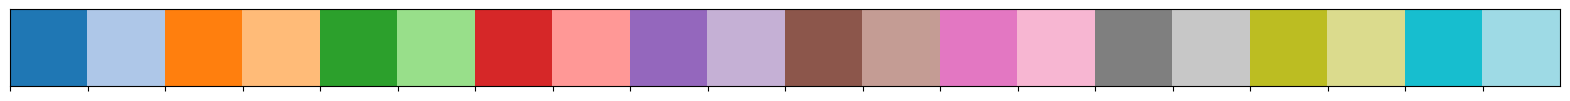

In [ ]:
# We used seaborn's default  tab20 palette for our visulizations:
palette = sns.color_palette("tab20")

sns.palplot(palette)
plt.show()

<ipython-input-27-23e63a71ef5c>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)


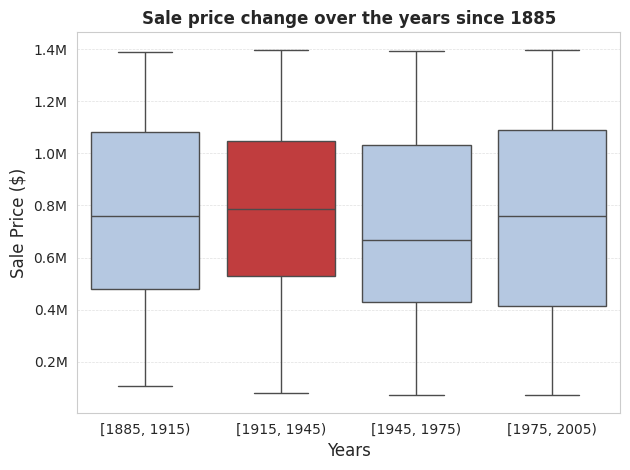

In [ ]:
# 2 colors from palette are chosen and added grids to make the visulization more understandable:
colors = [palette[1],palette[6],palette[1],palette[1]]
sns.set_style("whitegrid")
plt.grid(True, linestyle='--', linewidth=0.5, color='lightgray', alpha=0.7)

# Creating 4 year bins:
df['year_built_bin'] = pd.cut(df['year_built'], bins=range(1885, 2020, 30), right=False)

# Boxplot to show the price change over the years:
ax = sns.boxplot(data=df, x="year_built_bin", y="price_dkk", hue="year_built_bin", legend=False, palette=colors)

# Updating the y axis labels to represent millions better:
yticks = ax.get_yticks()
labels = [f"{tick/1000000:.1f}M" for tick in yticks]
ax.set_yticklabels(labels)

# Updating the labels and adding title:
ax.set_xlabel("Years", fontsize=12)
ax.set_ylabel("Sale Price ($)", fontsize=12)
ax.set_title("Sale price change over the years since 1885", fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

<ipython-input-28-807ab214a2ab>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)  # Apply formatted labels


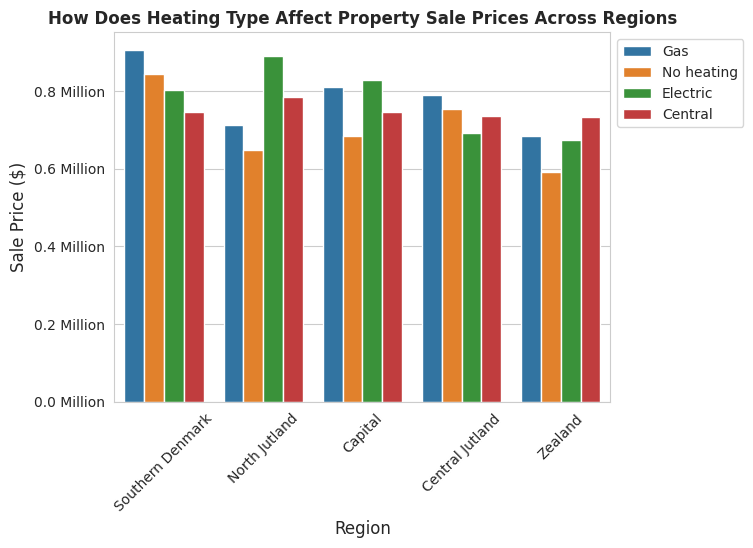

In [ ]:
# Choosing colors from palette:
colors=[palette[0],palette[2],palette[4],palette[6]]

#Defining the order of the regions as descending order and ordering the heating types for making it visually better:
region_order = ["Southern Denmark", "North Jutland", "Capital", "Central Jutland", "Zealand"]
heating_type_order = ["Gas","No heating","Electric", "Central"]

#Creating the bar plot with the specified region order and colored according to heating type and heating type order:
ax = sns.barplot(data=df, x="region", y="price_dkk", hue="heating_type",
                 estimator=np.mean, errorbar=None, order=region_order, hue_order=heating_type_order,palette=colors)

#Adjusting legend position to avoid overlap with the bars
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

#Setting axis labels with appropriate font size
ax.set_xlabel("Region", fontsize=12)
ax.set_ylabel("Sale Price ($)", fontsize=12)

#Modifying y-axis labels to display values in millions
yticks = ax.get_yticks()
labels = [f"{tick/1000000:.1f} Million" for tick in yticks]
ax.set_yticklabels(labels)  # Apply formatted labels

#Setting the title of the chart
ax.set_title("How Does Heating Type Affect Property Sale Prices Across Regions", fontsize=12,fontweight="bold")

#Rotating x-axis labels for better readability
plt.xticks(rotation=45)

#Showing the plot
plt.show()

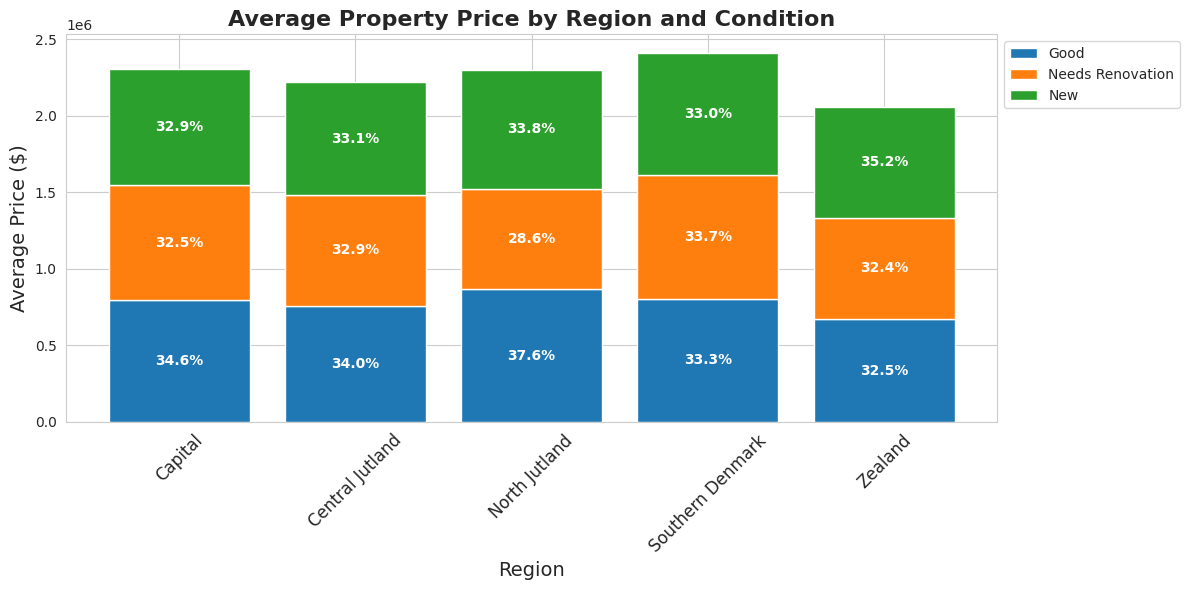

In [ ]:
# Choosing colors from tab20 palette:
colors = [palette[0], palette[2], palette[4], palette[6]]


# Data is grouped to calculate the average price by region and home condition:
grouped_data = df.groupby(['region', 'condition'])['price_dkk'].mean().unstack()

# Average price is calculated for each region to use for percentage notations:
totals = grouped_data.sum(axis=1)

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))  # Initialize a figure with custom size
bottoms = [0] * len(grouped_data)  # Keeps track of the bottom position for stacking

# Plot each condition as a separate segment in the stacked bar
for condition in grouped_data.columns:
    ax.bar(
        grouped_data.index,       # X-axis labels (regions)
        grouped_data[condition],  # Bar heights (average prices)
        bottom=bottoms,           # Start each bar from the current bottom
        label=condition           # Label for the legend
    )
    bottoms += grouped_data[condition]  # Update bottoms for stacking


# Each percentage added on each section of the bars:
for i, region in enumerate(grouped_data.index):
    cumulative = 0  # Track cumulative height of the bar for the region
    for condition in grouped_data.columns:
        value = grouped_data.loc[region, condition]  # Get the value for this section
        percentage = (value / totals[region]) * 100  # Calculate percentage of total
        if percentage > 5:  # Only annotate sections contributing more than 5%
            ax.text(
                i, cumulative + value / 2,  # Position: middle of the bar section
                f'{percentage:.1f}%',      # Percentage text
                ha='center', va='center',  # Center-align the text
                color='white', fontsize=10, fontweight='bold'  # Style for clarity
            )
        cumulative += value  # Update cumulative height


# Updated the graphs labels and titles and axis ticks:
ax.set_title('Average Property Price by Region and Condition', fontsize=16,fontweight="bold")  # Chart title
ax.set_xlabel('Region', fontsize=14)  # X-axis label
ax.set_ylabel('Average Price ($)', fontsize=14)  # Y-axis label
ax.set_xticks(range(len(grouped_data)))  # Set X-axis ticks
ax.set_xticklabels(grouped_data.index, rotation=45, fontsize=12)  # Label the X-axis ticks

# Updated the legend:
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))


plt.tight_layout()
plt.show()

<ipython-input-30-6ca434f910f7>:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot3 = df.pivot_table(values='price_dkk', index=year_built_bins, columns=distance_to_city_km_bins, aggfunc="mean")


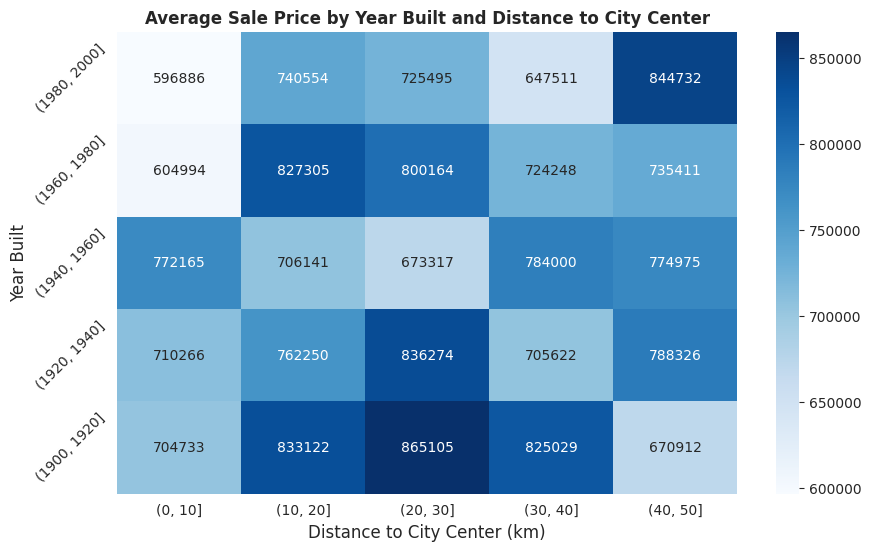

In [ ]:
# Created bins for distance to city center data and  built year:
distance_to_city_km_bins = pd.cut(df['distance_to_city_km'], bins=range(0, int(df['distance_to_city_km'].max()) + 10, 10))
year_built_bins = pd.cut(df['year_built'], bins=range(1900, 2020, 20))

# Creating a pivot table using price (mean value), year built and distance to city data:
pivot3 = df.pivot_table(values='price_dkk', index=year_built_bins, columns=distance_to_city_km_bins, aggfunc="mean")
# Updating the sort index so y axis values rises from bottom to top:
pivot3 = pivot3.sort_index(ascending=False)

# Plot size is choosen and heatmap created with the pivot table we made earlier:
plt.figure(figsize=(10, 6))
sns.heatmap(pivot3, annot=True, fmt=".0f", cmap="Blues")

# Adding title and updating the axis labels:
plt.title("Average Sale Price by Year Built and Distance to City Center",fontsize=12,fontweight="bold")
plt.xlabel("Distance to City Center (km)",fontsize=12)
plt.ylabel("Year Built",fontsize=12)
plt.yticks(rotation=45)
plt.show()


<ipython-input-66-48dfec9b9179>:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)


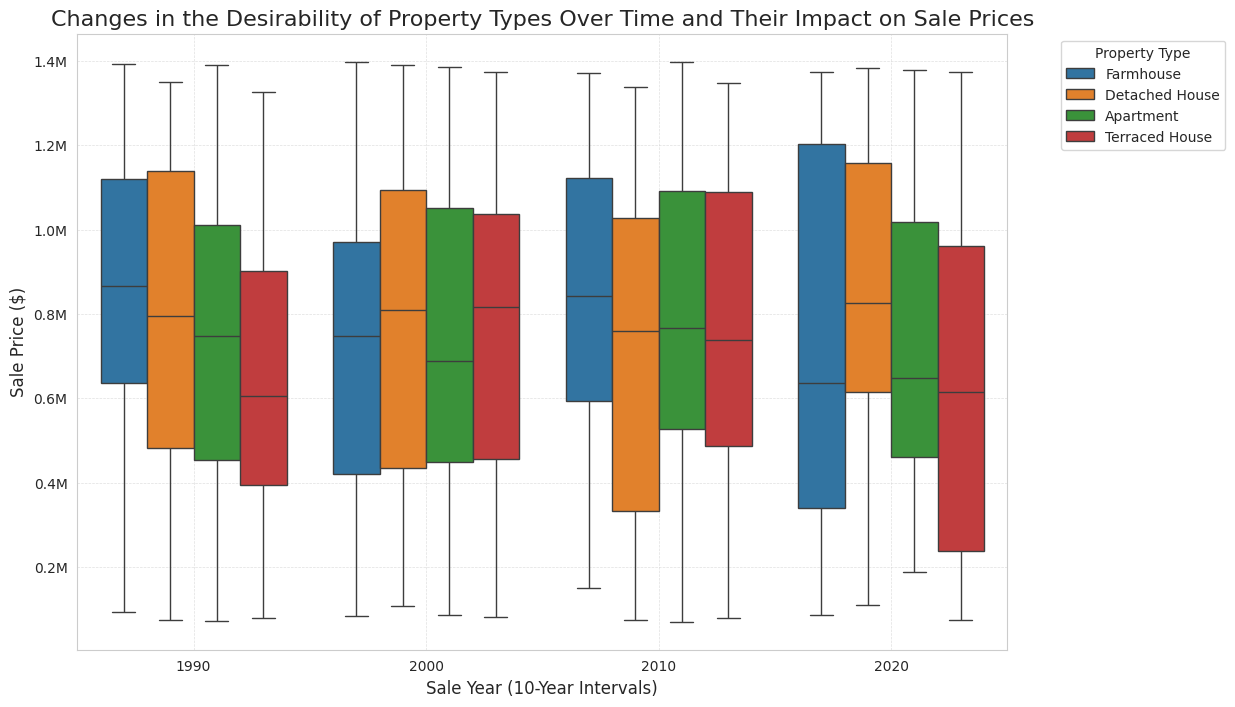

In [ ]:
# Grouping sale year in intervals of 10:
df['sale_year_group'] = (df['sale_year'] // 10) * 10

# Setting the figure size for the boxplot:
plt.figure(figsize=(12, 8))

# Choosing colors for the boxes:
colors = [palette[0], palette[2], palette[4], palette[6]]

# Creating a boxplot to show the distribution of 'price_dkk' , 'sale_year_group' and 'property_type':
ax = sns.boxplot(data=df, x='sale_year_group', y='price_dkk', hue='property_type', palette=colors)

# Setting the title of the plot:
plt.title("Changes in the Desirability of Property Types Over Time and Their Impact on Sale Prices", fontsize=12,fontweight="bold")

# Setting the x-axis label:
plt.xlabel("Sale Year (10-Year Intervals)", fontsize=12)

# Setting the y-axis label:
plt.ylabel("Sale Price ($)", fontsize=12)

# Moving the 'property_type' color indicator to the right side of the plot:
plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Customizing the grid: making it lighter and adding more grid lines for easy comparison:
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray', alpha=0.7)

# Updating the x-axis tick labels to show as integers:
current_labels = df['sale_year_group'].unique()
plt.xticks(ticks=range(len(current_labels)), labels=[int(label) for label in sorted(current_labels)])

# Updating the y axis labels to represent the millions better:
yticks = ax.get_yticks()
labels = [f"{tick/1000000:.1f}M" for tick in yticks]
ax.set_yticklabels(labels)

plt.show()

<ipython-input-53-50dfdfcca535>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.lineplot(x='Year_Bin', y='price_dkk', data=df_with_garden.groupby('Year_Bin')['price_dkk'].mean().reset_index(),
<ipython-input-53-50dfdfcca535>:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.lineplot(x='Year_Bin', y='price_dkk', data=df_without_garden.groupby('Year_Bin')['price_dkk'].mean().reset_index(),


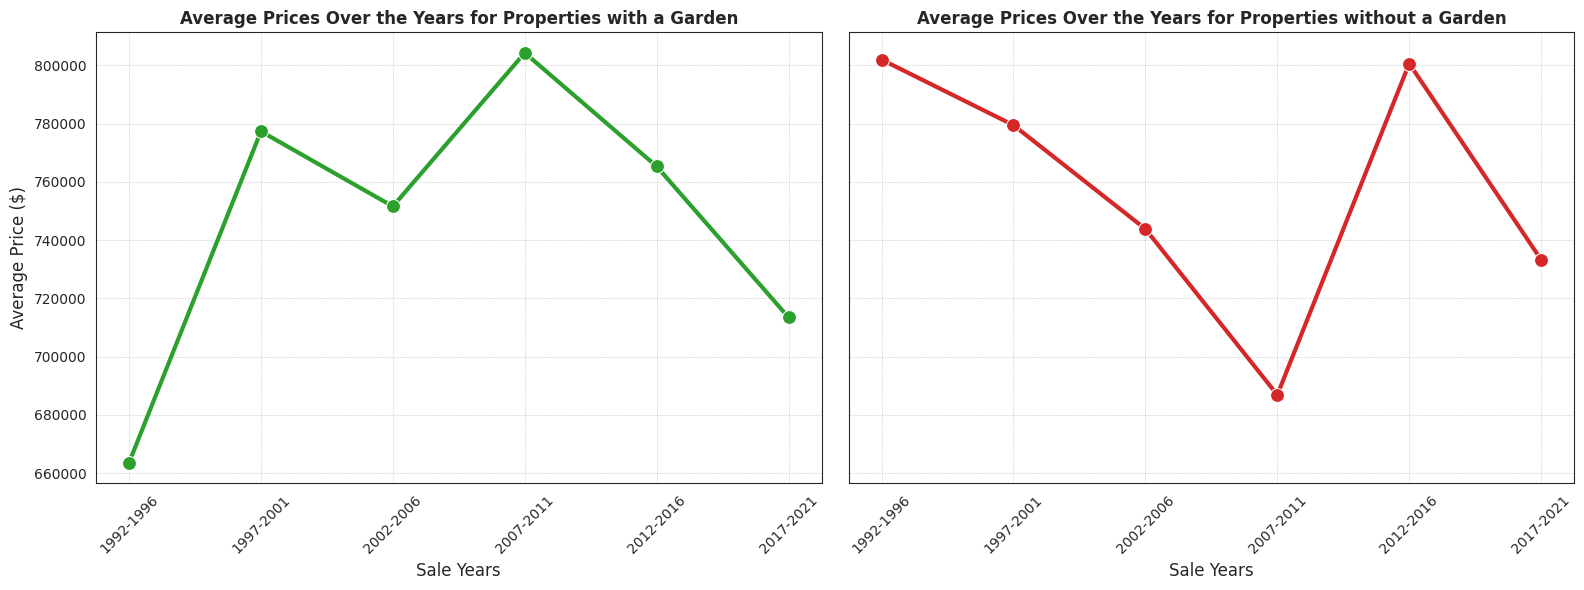

In [ ]:
# This code is designed to visualize and compare the average property prices over time based on whether the properties have a garden or not, using line plots grouped by 5-year intervals.

# Set the plot style to a clean white background
sns.set_style("white")

# Define 5-year bins for the sale_year column
bins = list(range(1992, 2025, 5))
# Create labels for each bin (e.g., '1992-1996', '1997-2001')
labels = [f'{x}-{x+4}' for x in bins[:-1]]

# The sale years in the dataset are grouped into 5-year intervals using pd.cut()
df['Year_Bin'] = pd.cut(df['sale_year'], bins=bins, labels=labels, right=False)  # The bins define the ranges, and the labels are created accordingly.

# Filter the dataset to include properties with a garden
df_with_garden = df[df['garden_available'] == 'Yes']
# Filter the dataset to include properties without a garden
df_without_garden = df[df['garden_available'] == 'No']

# Create a figure with two side-by-side subplots that share the same y-axis
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot the average prices over time for properties with a garden
sns.lineplot(x='Year_Bin', y='price_dkk', data=df_with_garden.groupby('Year_Bin')['price_dkk'].mean().reset_index(),
             marker='o', markersize=10, color=palette[4], linewidth=3, ax=axes[0])
# Set the title for the first plot
axes[0].set_title('Average Prices Over the Years for Properties with a Garden', fontsize=12,fontweight='bold')
# Set the x-axis label for the first plot
axes[0].set_xlabel('Sale Years', fontsize=12)
# Set the y-axis label for the first plot
axes[0].set_ylabel('Average Price ($)', fontsize=12)
# Rotate the x-axis labels for better visibility
axes[0].tick_params(axis='x', rotation=45)
# Add gridlines to the first plot
axes[0].grid(color='gray', linestyle='--', linewidth=0.4, alpha=0.4)

# Plot the average prices over time for properties without a garden
sns.lineplot(x='Year_Bin', y='price_dkk', data=df_without_garden.groupby('Year_Bin')['price_dkk'].mean().reset_index(),
             marker='o', markersize=10, color=palette[6], linewidth=3, ax=axes[1])
# Set the title for the second plot
axes[1].set_title('Average Prices Over the Years for Properties without a Garden', fontsize=12,fontweight='bold')
# Set the x-axis label for the second plot
axes[1].set_xlabel('Sale Years', fontsize=12)
# Rotate the x-axis labels for better visibility
axes[1].tick_params(axis='x', rotation=45)
# Add gridlines to the second plot
axes[1].grid(color='gray', linestyle='--', linewidth=0.4, alpha=0.4)

# Adjust the layout to ensure the plots do not overlap
plt.tight_layout()
# Display the final visualization
plt.show()

In [ ]:
#Creating a column called energy efficency for next graph:
# it groups energy labels as efficent (A-B), normal (C-D-E) and not efficent (F-G-H)

def categorize_energy_label(label):
    # If energy label is 'A' or 'B', classify as 'High Efficient'
    if label in ('A', 'B'):
        return 'High Efficient'
    # If energy label is 'C', 'D', or 'E', classify as 'Moderately Efficient'
    elif label in ('C', 'D', 'E'):
        return 'Moderately Efficient'
    # If energy label is 'F', 'G', or 'H', classify as 'Low Efficient'
    elif label in ('F', 'G', 'H'):
        return 'Low Efficient'

df['energy_efficiency'] = df['energy_label'].apply(categorize_energy_label)

df["energy_efficiency"].value_counts()


,count
energy_efficiency,
Normal,439
Not Efficient,278
Efficient,243


<ipython-input-84-7ee945dab5e2>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, x="energy_efficiency" , y="price_dkk", hue=sale_year_bins, palette=colors,ci=None)


Text(0.5, 1.0, 'Price change for each energy efficiency over the years')

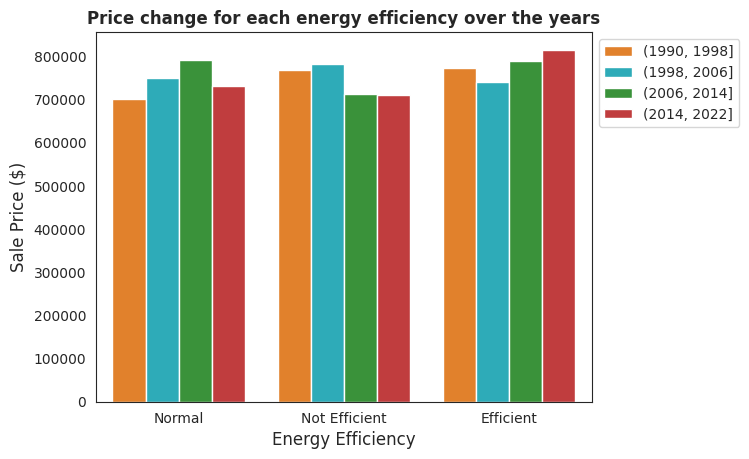

In [ ]:
# Calculate the mean price for each energy efficiency category
mean_prices = df.groupby('energy_efficiency')['price_dkk'].mean().reset_index()


# The 'efficient_order' will list energy efficiency categories ordered by their mean prices
efficient_order = mean_prices.sort_values('price_dkk')['energy_efficiency'].tolist()

# The sale year is being divided into bins for better categorization
df["sale_year"] = df["sale_year"].astype(int) # Transforming "sale_year" to proper data type
sale_year_bins = pd.cut(df['sale_year'], bins=range(1990, df["sale_year"].max(), 8)) # Division process

# Define the custom color palette tab20
colors =[palette[2], palette[-2], palette[4], palette[6]]


# Creating the clustered bar plot with the specified order for energy efficiency categories and custom palette by seaborn
ax = sns.barplot(
    data=df,                    # Data to be plotted
    x="energy_efficiency",       # Energy efficiency on the x-axis
    y="price_dkk",               # Property price (in DKK) on the y-axis
    hue=sale_year_bins,          # Sale year bins will be used for color coding (hue)
    palette=colors,      # Custom color palette for the different categories
    ci=None,                     # Confidence intervals are not shown
    order=efficient_order        # Specifying the order of categories based on their mean price
)


# This moves the legend outside the plot to prevent it from covering the bars
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Seting axis labels with appropriate font size
ax.set_xlabel("Energy Efficiency", fontsize=12)
ax.set_ylabel("Sale Price ($)", fontsize=12)


# Adding a title to the plot to explain what is the graph represent
ax.set_title("Average Property Prices in Denmark by Energy Efficiency (1990-2022)", fontsize=14)

# Show the plot
plt.show()